# Business Problem

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
df  = pd.read_csv('/content/canada_per_capita_income .csv')

In [3]:
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [4]:
df.shape

(47, 2)

## Discover and visualize the data to gain insights

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 880.0 bytes


In [6]:
df.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


Text(0.5, 1.0, 'Scatter Plot of Year vs Per Capita Income (US$)')

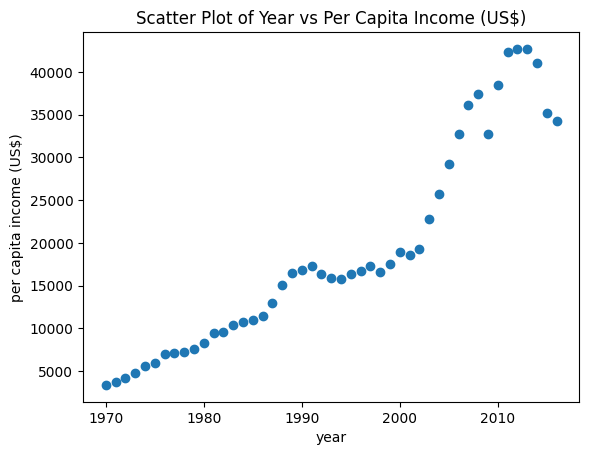

In [10]:
plt.scatter(df[['year']], df[['per capita income (US$)']])
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.title('Scatter Plot of Year vs Per Capita Income (US$)')


## Prepare the data for Machine Learning algorithms

In [11]:
# Data Cleaning

In [12]:
df.isnull().sum()

year                       0
per capita income (US$)    0
dtype: int64

In [13]:
df.mean()

year                        1993.000000
per capita income (US$)    18920.137063
dtype: float64

In [14]:
df2 = df.fillna(df.mean())

In [15]:
df2.isnull().sum()

year                       0
per capita income (US$)    0
dtype: int64

In [16]:
# split dataset

In [17]:
X = df2.drop("year", axis = "columns")
y = df2.drop("per capita income (US$)", axis = "columns")

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=3) #, random_state=51

In [19]:
X_train

,per capita income (US$)
13,10416.536590
34,25719.147150
31,18601.397240
4,5576.514583
45,35175.188980
46,34229.193630
15,11018.955850
37,36144.481220
11,9434.390652
7,7100.126170


In [20]:
y_train

,year
13,1983
34,2004
31,2001
4,1974
45,2015
46,2016
15,1985
37,2007
11,1981
7,1977


In [21]:
X_test

,per capita income (US$)
35,29198.055690
44,41039.893600
18,15080.283450
23,15875.586730
27,17310.757750
12,9619.438377
9,7602.912681
16,11482.891530
6,7062.131392
25,16369.317250


In [22]:
y_test

,year
35,2005
44,2014
18,1988
23,1993
27,1997
12,1982
9,1979
16,1986
6,1976
25,1995


# Select a model and train it

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
lr.coef_

array([[0.00107706]])

In [25]:
lr.intercept_

array([1972.48704078])

In [26]:
m = 0.00107706
c = 1972.48704078
z  = m * 1993 + c
z

1974.63362136

In [27]:
lr.predict([[1993]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1974.63361748]])

In [28]:
y_pred  = lr.predict(X_test)
y_pred

array([[2003.93504188],
       [2016.68938879],
       [1988.72938155],
       [1989.58596936],
       [1991.13173187],
       [1982.84773438],
       [1980.67581913],
       [1984.85478161],
       [1980.09336629],
       [1990.11774579]])

In [29]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["year", "per capita income(US$)","sper capita income(US$)_predicted"])

,year,per capita income(US$),sper capita income(US$)_predicted
0,29198.055690,2005.0,2003.935042
1,41039.893600,2014.0,2016.689389
2,15080.283450,1988.0,1988.729382
3,15875.586730,1993.0,1989.585969
4,17310.757750,1997.0,1991.131732
5,9619.438377,1982.0,1982.847734
6,7602.912681,1979.0,1980.675819
7,11482.891530,1986.0,1984.854782
8,7062.131392,1976.0,1980.093366
9,16369.317250,1995.0,1990.117746


## Fine-tune your model

In [30]:
lr.score(X_test,y_test)

0.9204580406858648

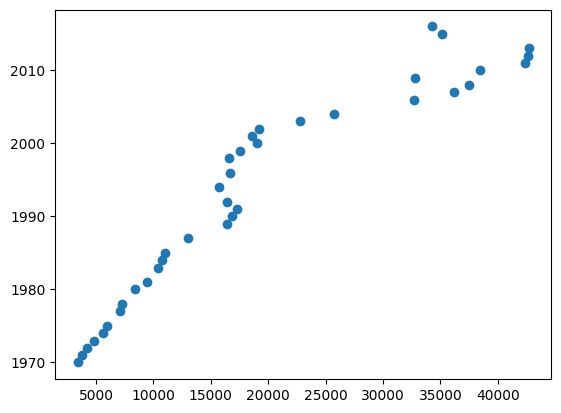

In [31]:
plt.scatter(X_train,y_train)

In [32]:
lr.predict(X_train)

array([[1983.70625543],
       [2000.18805541],
       [1992.52182553],
       [1978.49327073],
       [2010.37276144],
       [2009.35386953],
       [1984.35509595],
       [2011.41674545],
       [1982.64842723],
       [1980.13428887],
       [2012.81908029],
       [1992.93755396],
       [1996.97872304],
       [2018.45207484],
       [1978.94739047],
       [2013.86817447],
       [1976.54571643],
       [1990.39062343],
       [1977.06580358],
       [1990.16380709],
       [2007.74805057],
       [1986.46166077],
       [1990.47372364],
       [1984.10885125],
       [1991.42282446],
       [1990.6232694 ],
       [1993.2012104 ],
       [2018.08398253],
       [2007.76626785],
       [1981.48690356],
       [1990.17957779],
       [1991.08363039],
       [1976.14828319],
       [1980.29352206],
       [1977.66172662],
       [1989.45697393],
       [2018.43999843]])

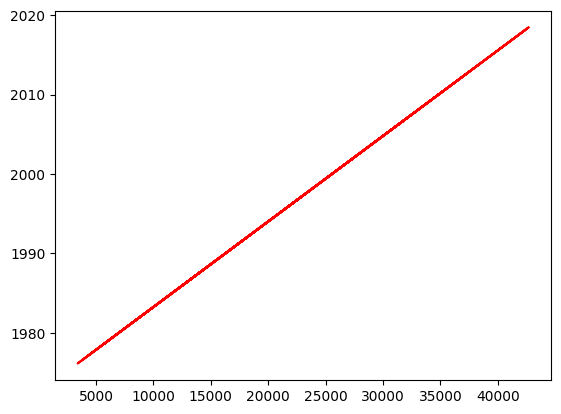

In [33]:
plt.plot(X_train, lr.predict(X_train), 'r-')

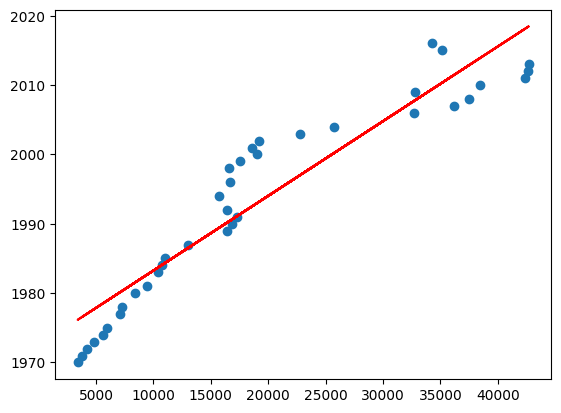

In [34]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train), color = "r")

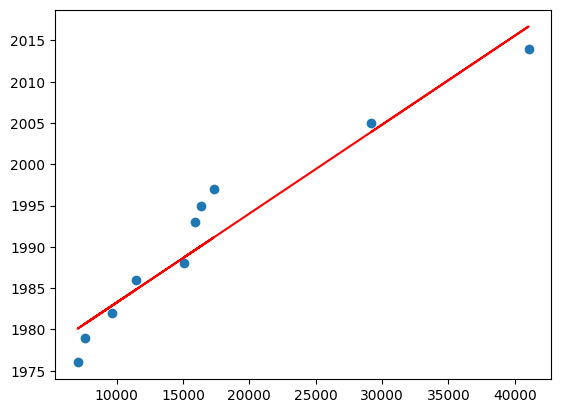

In [35]:
plt.scatter(X_test, y_test)
plt.plot(X_test, lr.predict(X_test), color = "r")

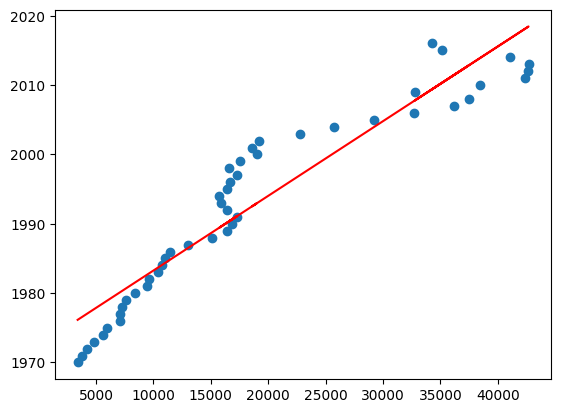

In [36]:
plt.scatter(X, y)
plt.plot(X, lr.predict(X), color = "r")